In [1]:
%pip install pandas matplotlib seaborn kagglehub wordcloud
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

Note: you may need to restart the kernel to use updated packages.


In [2]:
df = pd.read_csv(r"C:\Users\hongye\Documents\GitHub\bootcamp\data_project\sentimentdataset.csv")

In [3]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [4]:
# drop the first two unnamed columns
df = df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])

In [5]:
df.info()
# no missing values in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Text       732 non-null    object 
 1   Sentiment  732 non-null    object 
 2   Timestamp  732 non-null    object 
 3   User       732 non-null    object 
 4   Platform   732 non-null    object 
 5   Hashtags   732 non-null    object 
 6   Retweets   732 non-null    float64
 7   Likes      732 non-null    float64
 8   Country    732 non-null    object 
 9   Year       732 non-null    int64  
 10  Month      732 non-null    int64  
 11  Day        732 non-null    int64  
 12  Hour       732 non-null    int64  
dtypes: float64(2), int64(4), object(7)
memory usage: 74.5+ KB


In [ ]:
df.duplicated().sum()
# 20 line of duplicates, so we drop them
df = df.drop_duplicates()

0

In [14]:
# add weekday
df["Datetime"] = pd.to_datetime(df[["Year", "Month", "Day", "Hour"]])
df["Weekday"] = df["Datetime"].dt.day_name()

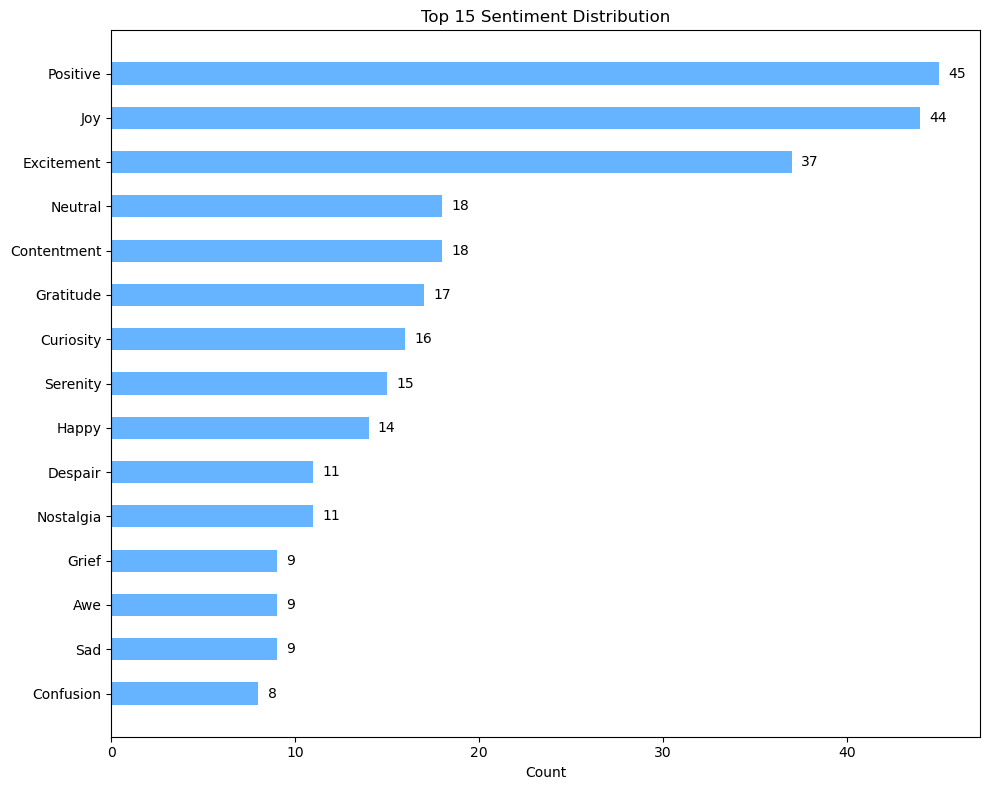

In [15]:
# distribution of sentiments

# clean the sentiment column
df["Sentiment_clean"] = df["Sentiment"].str.strip()

# too much kind of data, so we will only take the top 15 sentiments
sentiment_counts = df["Sentiment_clean"].value_counts().head(15)
sentiments = sentiment_counts.index
counts = sentiment_counts.values

plt.figure(figsize=(10, 8))
plt.barh(range(len(sentiments)), counts, height=0.5, color='#66b3ff')
plt.yticks(range(len(sentiments)), sentiments)
plt.xlabel("Count")
plt.title("Top 15 Sentiment Distribution")

for i, count in enumerate(counts):
    plt.text(count + 0.5, i, str(count), va='center', fontsize=10)

plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

C:\Users\hongye\AppData\Local\Temp\ipykernel_79564\3779805032.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=platform_counts, x="Platform", y="Count", palette="viridis")


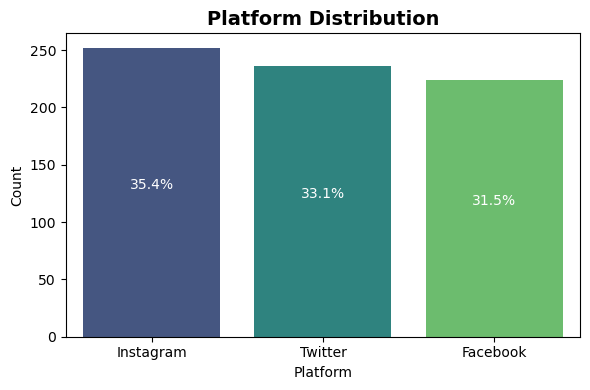

In [16]:
# distribution of platforms

# clean the platform column, avoid duplicate twitter
df["Platform_clean"] = df["Platform"].str.strip().str.title()
platform_counts = df["Platform_clean"].value_counts().reset_index()
platform_counts.columns = ["Platform", "Count"]

plt.figure(figsize=(6, 4))
ax = sns.barplot(data=platform_counts, x="Platform", y="Count", palette="viridis")

# add persentage
total = platform_counts["Count"].sum()
platform_counts["Percent"] = platform_counts["Count"] / total * 100

for p, percent in zip(ax.patches, platform_counts["Percent"]):
    ax.annotate(f'{percent:.1f}%',  
                (p.get_x() + p.get_width() / 2., p.get_height() / 2),  
                ha='center', va='bottom', fontsize=10, color='white')

plt.title("Platform Distribution", fontsize=14, fontweight='bold')
plt.xlabel("Platform")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

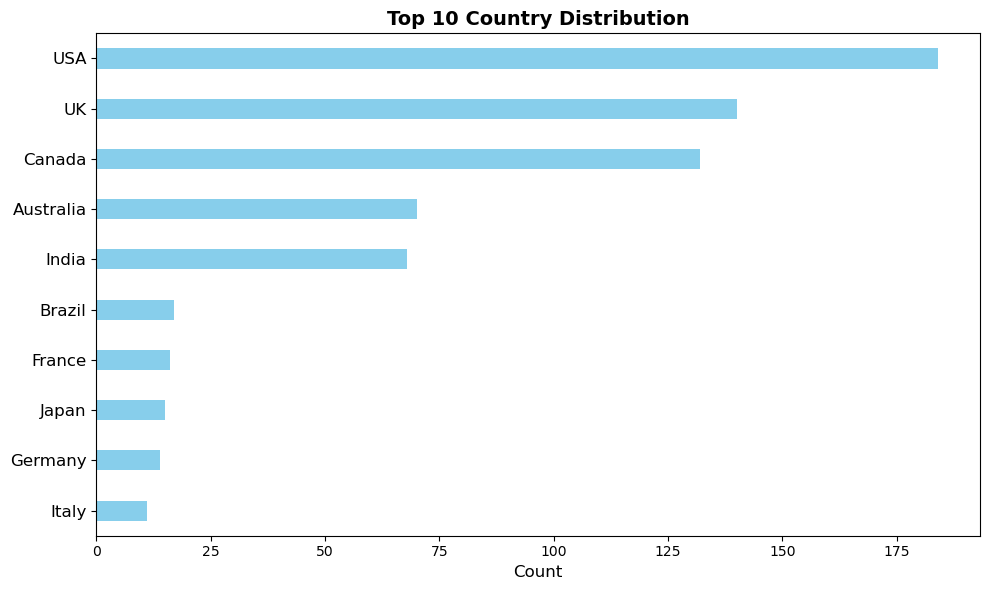

In [17]:
# distribution of countries

# clean the country column, avoid duplicate USA
df["Country_clean"] = df["Country"].str.strip()

# too much kind of data, so we will only take the top 10 countries
country_counts = df["Country_clean"].value_counts().head(10)
countries = country_counts.index
counts = country_counts.values

plt.figure(figsize=(10, 6))
plt.barh(range(len(countries)), counts, height=0.4, color='skyblue')

plt.yticks(range(len(countries)), countries, fontsize=12)
plt.xlabel("Count", fontsize=12)
plt.title("Top 10 Country Distribution", fontsize=14, fontweight='bold')

plt.ylim(-0.5, len(countries) - 0.5)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

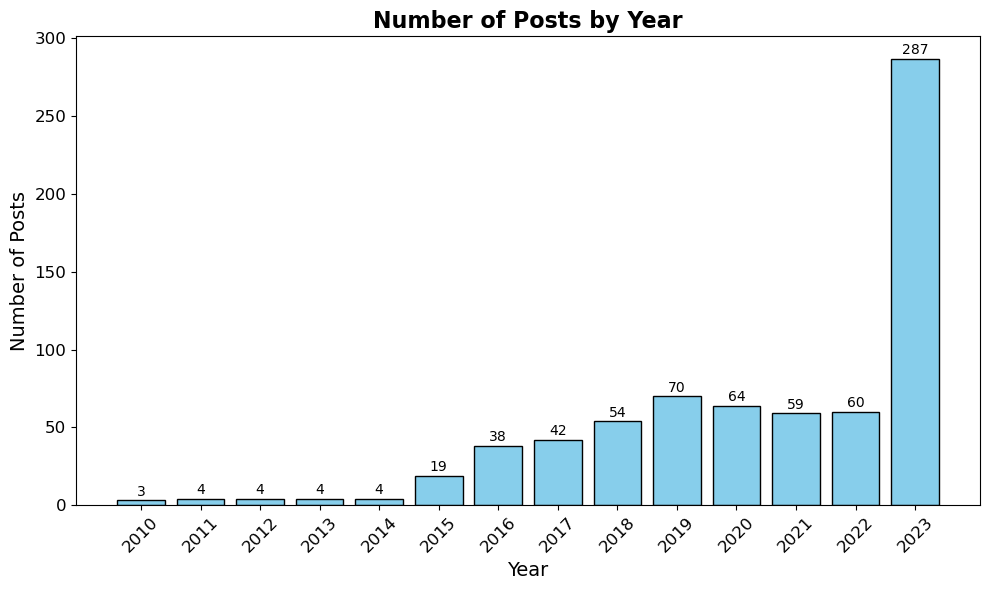

In [18]:
# number of posts by year

year_counts = df["Year"].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(year_counts.index.astype(str), year_counts.values, color='skyblue', edgecolor='black')

plt.title("Number of Posts by Year", fontsize=16, fontweight='bold')
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Posts", fontsize=14)

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

for i, val in enumerate(year_counts.values):
    plt.text(i, val + max(year_counts.values)*0.01, str(val), ha='center', fontsize=10)

plt.tight_layout()
plt.show()


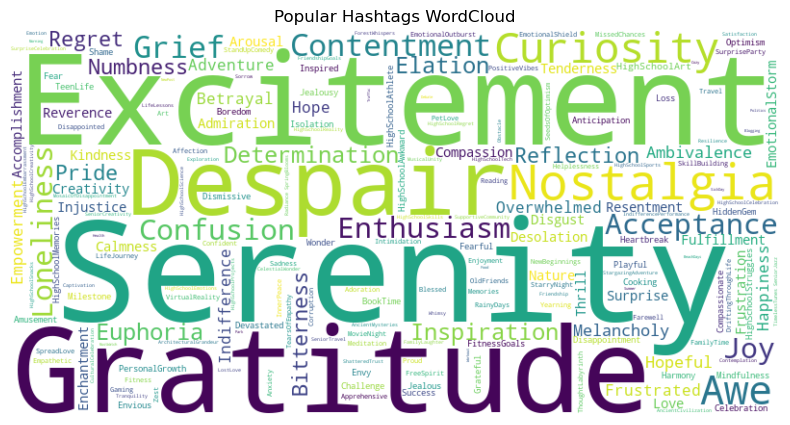

In [19]:
# hashtags wordcloud

all_hashtags = df["Hashtags"].dropna().str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_hashtags)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Popular Hashtags WordCloud")
plt.show()

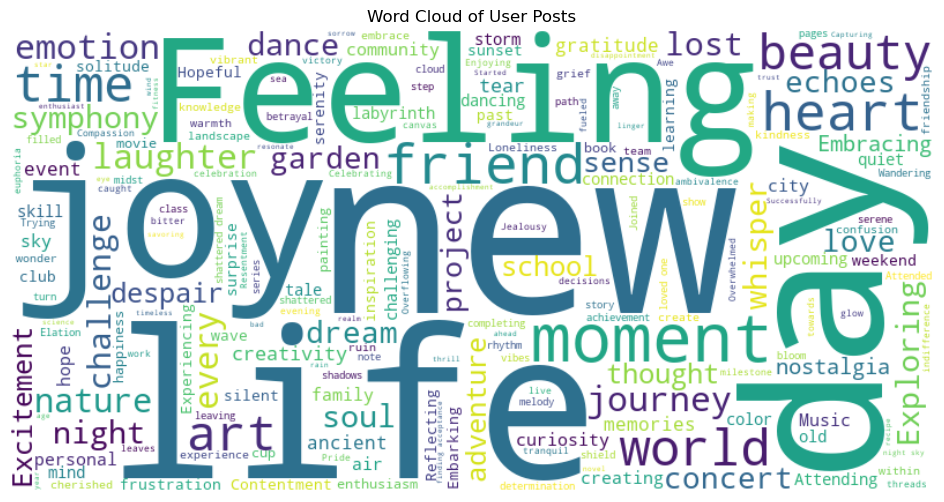

In [20]:
# text wordcloud
all_text = " ".join(df["Text"])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords, max_words=200, collocations=True).generate(all_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of User Posts")
plt.show()

In [21]:
%pip install textblob
from textblob import TextBlob

# use TextBlob to calculate the polarity of the sentiment
df["Polarity"] = df["Sentiment_clean"].apply(lambda x: TextBlob(x).sentiment.polarity)
df["Sentiment_Polarity"] = df["Polarity"].apply(
    lambda x: "Positive" if x > 0.1 else "Negative" if x < -0.1 else "Neutral"
)

Note: you may need to restart the kernel to use updated packages.


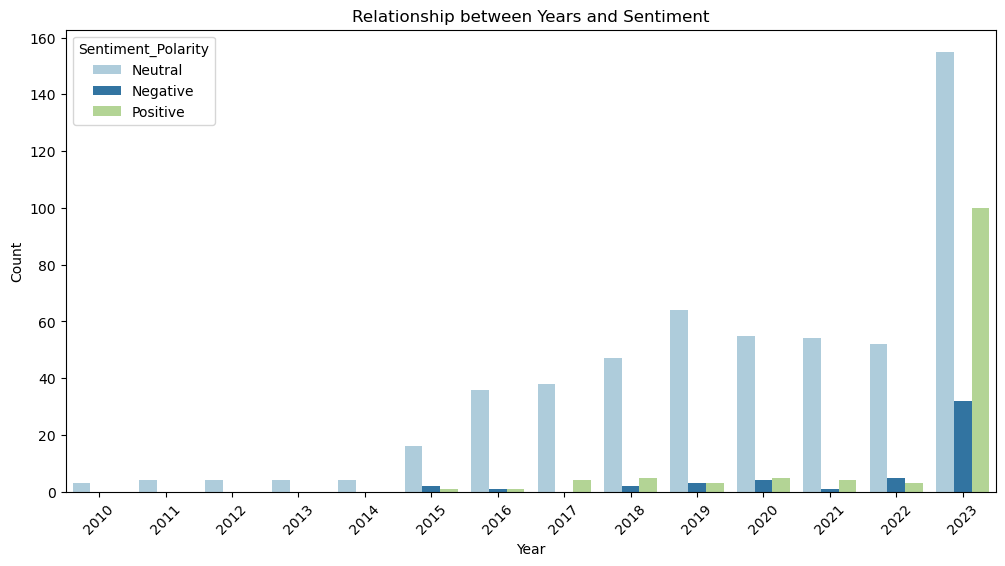

In [22]:
# distribution of sentiments polarity by year

plt.figure(figsize=(12, 6))
sns.countplot(x='Year', hue='Sentiment_Polarity', data=df, palette='Paired')
plt.title('Relationship between Years and Sentiment')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


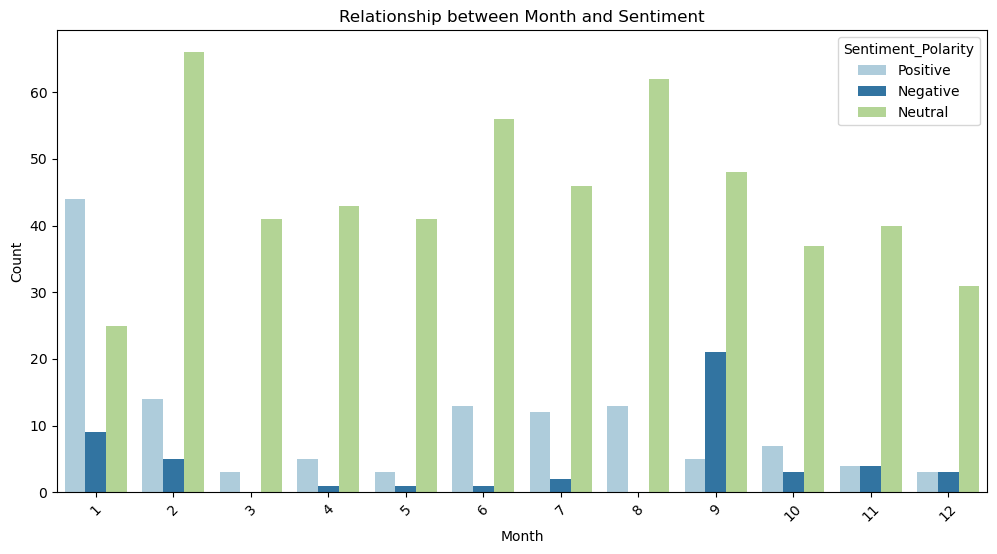

In [23]:
# distribution of sentiments polarity by month

plt.figure(figsize=(12, 6))
sns.countplot(x='Month', hue='Sentiment_Polarity', data=df, palette='Paired')
plt.title('Relationship between Month and Sentiment')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

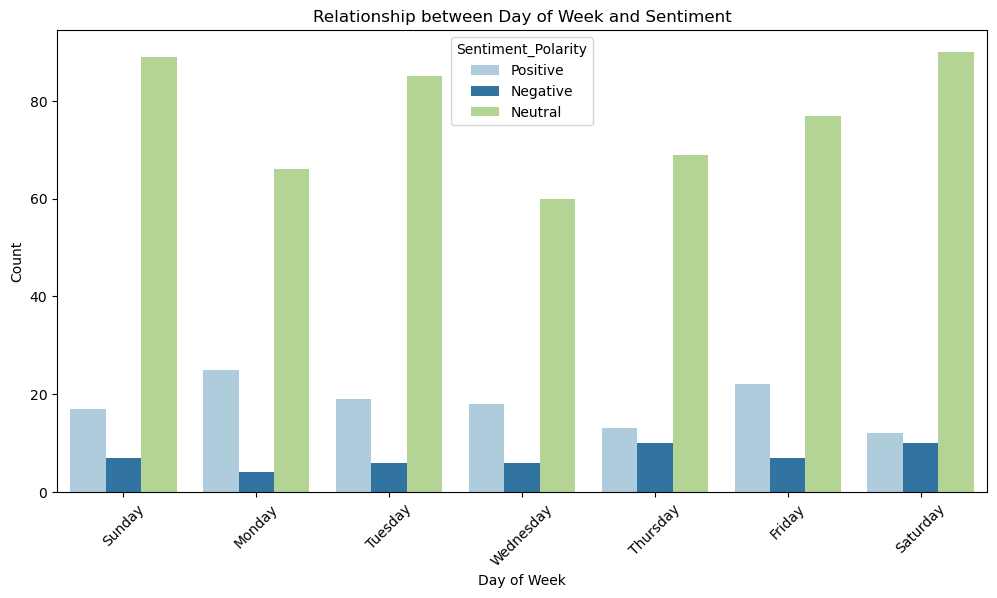

In [24]:
# distribution of sentiments polarity by weekday

plt.figure(figsize=(12, 6))
sns.countplot(x='Weekday', hue='Sentiment_Polarity', data=df, palette='Paired')
plt.title('Relationship between Day of Week and Sentiment')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

C:\Users\hongye\AppData\Local\Temp\ipykernel_79564\4118215420.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Hour", palette="viridis")


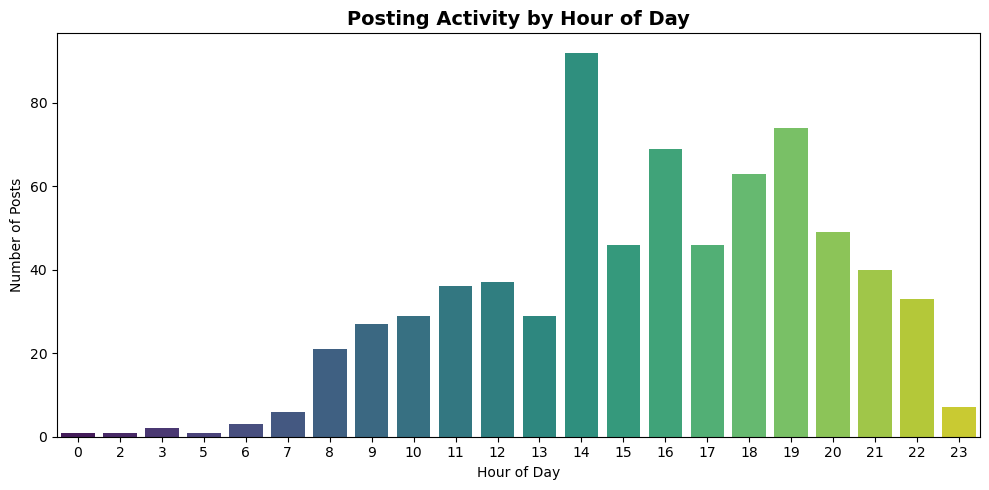

In [25]:
# posting activity and polarity by hour of day

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="Hour", palette="viridis")
plt.title("Posting Activity by Hour of Day", fontsize=14, fontweight='bold')
plt.xlabel("Hour of Day")
plt.ylabel("Number of Posts")
plt.xticks(fontsize=10)
plt.tight_layout()
plt.show()